In [1]:
import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nex_df = pd.read_csv('data/nexrad_testing_10k.csv')
nex_df['timestamp'] = pd.to_datetime(nex_df['timestamp'])
nex_df = nex_df.set_index(pd.DatetimeIndex(nex_df['timestamp']))
nex_df = nex_df.dropna()
print(nex_df.dtypes)
nex_df.head()

timestamp    datetime64[ns]
60601               float64
60655               float64
60651               float64
60609               float64
60625               float64
60624               float64
60631               float64
60626               float64
60613               float64
60640               float64
60641               float64
60616               float64
60643               float64
60605               float64
60707               float64
60652               float64
60622               float64
60637               float64
60608               float64
60827               float64
60615               float64
60645               float64
60649               float64
60633               float64
60603               float64
60666               float64
60628               float64
60611               float64
60618               float64
                  ...      
60606               float64
60647               float64
60629               float64
60620               float64
60639               

,timestamp,60601,60655,60651,60609,60625,60624,60631,60626,60613,...,60646,60617,60623,60636,60634,60659,60607,60654,60657,diff
2016-08-04 21:09:06,2016-08-04 21:09:06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003342,0.000000,0.073611
2016-08-04 21:13:51,2016-08-04 21:13:51,0.004265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003594,0.000000,0.079167
2016-08-04 21:18:15,2016-08-04 21:18:15,0.003230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006362,0.000000,0.073333
2016-08-04 21:23:00,2016-08-04 21:23:00,0.027401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003353,0.003907,0.000000,0.079167
2016-08-04 21:27:45,2016-08-04 21:27:45,0.003423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007075,0.079167


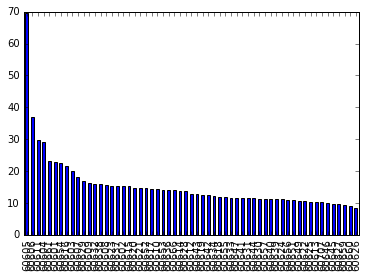

In [3]:
zip_cols = nex_df.columns.values[1:len(nex_df.columns.values)-1]
zip_precip = nex_df[zip_cols].sum()
zip_precip = zip_precip.sort_values(ascending=False)
zip_precip.plot(kind='bar')

In [4]:
zip_area = pd.read_csv('data/zip_code_area.csv')
print(zip_area.dtypes)
zip_area.head()

zip             int64
shape_area    float64
dtype: object


,zip,shape_area
0,60647,1.060523e+08
1,60639,1.274761e+08
2,60707,4.506904e+07
3,60622,7.085383e+07
4,60651,9.903962e+07


In [8]:
zip_precip.head()

60605    69.449973
60606    36.871363
60611    29.912579
60604    29.075238
60661    23.094579
dtype: float64

### Difference in Zip Code Precipitation

The differences in the top zip codes for precipitation seem pretty extreme, and could possibly be a result of the top zip code (60605) being much smaller. Plotting versus zip code areas (obtained from the city data portal) to see if this makes sense. Doesn't seem like there's a relationship though

In [7]:
zip_precip_sum = pd.DataFrame(zip_precip).reset_index()
zip_precip_sum = zip_precip_sum.rename(columns={'index':'zip',0:'precip'})
zip_precip_sum.head()

,zip,precip
0,60605,69.449973
1,60606,36.871363
2,60611,29.912579
3,60604,29.075238
4,60661,23.094579


In [8]:
zip_precip_sum['zip'] = zip_precip_sum['zip'].astype(int)
zip_precip_area = zip_precip_sum.merge(zip_area, on='zip')
zip_precip_area.head()

,zip,precip,shape_area
0,60605,69.449973,3.630128e+07
1,60606,36.871363,6.766411e+06
2,60611,29.912579,2.350606e+07
3,60604,29.075238,4.294902e+06
4,60661,23.094579,9.357756e+06


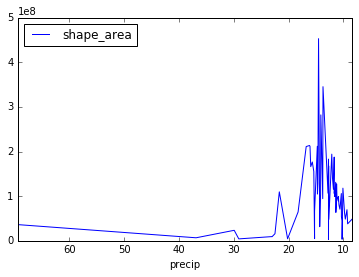

In [9]:
zip_precip_area.plot(x='precip',y='shape_area')